In [2]:
import numpy as np
import random 
import math
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('time_series_covid_19_confirmed.csv')
data = data.drop(['Province/State', 'Lat', 'Long'], axis = 1)
data = data.groupby(['Country/Region']).sum()
data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967
Albania,0,0,0,0,0,0,0,0,0,0,...,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402
Algeria,0,0,0,0,0,0,0,0,0,0,...,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273
Andorra,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
Angola,0,0,0,0,0,0,0,0,0,0,...,172,176,183,186,189,197,212,212,259,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,675,784,833,1001,1169,1328,1382,1557,1815,1990
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,9,9,9,10,10,10,10,10,10,10
Yemen,0,0,0,0,0,0,0,0,0,0,...,919,922,941,967,992,1015,1076,1089,1103,1118


In [4]:
#data = data.drop(['Country/Region'])
data.to_csv (r'export_dataframe.csv', index = False, header=True)
data = pd.read_csv('export_dataframe.csv')
data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
0,0,0,0,0,0,0,0,0,0,0,...,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967
1,0,0,0,0,0,0,0,0,0,0,...,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402
2,0,0,0,0,0,0,0,0,0,0,...,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273
3,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,0,0,0,0,0,0,0,0,0,0,...,172,176,183,186,189,197,212,212,259,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,0,0,0,0,0,0,0,0,0,0,...,675,784,833,1001,1169,1328,1382,1557,1815,1990
184,0,0,0,0,0,0,0,0,0,0,...,9,9,9,10,10,10,10,10,10,10
185,0,0,0,0,0,0,0,0,0,0,...,919,922,941,967,992,1015,1076,1089,1103,1118
186,0,0,0,0,0,0,0,0,0,0,...,1430,1430,1430,1430,1477,1489,1497,1531,1531,1557


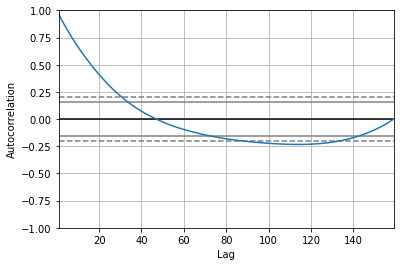

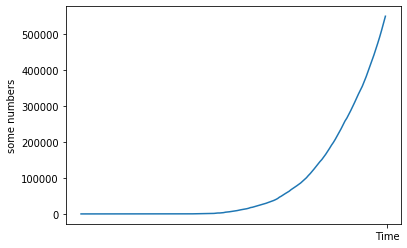

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
6/24/20    473105
6/25/20    490401
6/26/20    508953
6/27/20    528859
6/28/20    548318
Name: 79, Length: 159, dtype: int64

In [5]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
autocorrelation_plot(data.loc[79])
pyplot.show()
import matplotlib.pyplot as plt
plt.plot(data.loc[79])
plt.ylabel('some numbers')
plt.xticks('Time')
plt.show()
data.loc[79]  #India 

In [6]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(np.array(data.loc[79]), order=(5,1,0))
model_fit = model.fit(disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  158
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1219.665
Method:                       css-mle   S.D. of innovations            515.172
Date:                Wed, 01 Jul 2020   AIC                           2453.329
Time:                        18:22:49   BIC                           2474.767
Sample:                             1   HQIC                          2462.036
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3470.3691        nan        nan        nan         nan         nan
ar.L1.D.y      0.8319   7.15e-06   1.16e+05      0.000       0.832       0.832
ar.L2.D.y      0.2256   4.59e-06   4.91e+04      0.0

/home/nopc/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/nopc/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/home/nopc/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/nopc/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/nopc/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


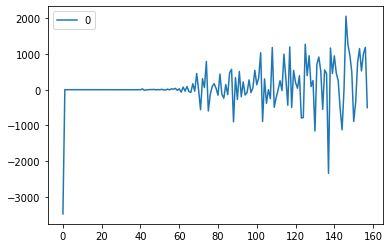

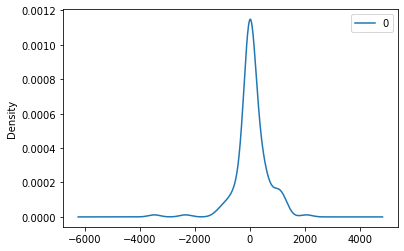

                 0
count   158.000000
mean     75.590346
std     581.422360
min   -3470.369085
25%     -11.657132
50%      -0.000053
75%     267.476956
max    2051.129192


In [7]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=409583.225018, expected=410451.000000
predicted=426029.326591, expected=425282.000000
predicted=440439.489225, expected=440215.000000
predicted=455319.922645, expected=456183.000000
predicted=471842.616549, expected=473105.000000
predicted=489754.646557, expected=490401.000000
predicted=507806.658481, expected=508953.000000
predicted=527607.403383, expected=528859.000000
predicted=548881.164434, expected=548318.000000
Test MSE: 812884.477


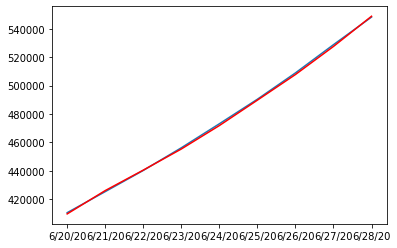

In [8]:
import warnings

warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
train, test = data.loc[79][0:150], data.loc[79][150:159]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

def fitness_function(x):
    ''' Main Steps Involve Cleaning The Data Being Processed , Following to which we may face Unexpected Errors '''
    print("The Random Set is as Follows : ", x[0])
    
    counter_for_number_of_features_to_be_selected = 0 
    
    for index in range(len(x[0])): # In Example , 150 
        if x[0][index] == 1 :
            counter_for_number_of_features_to_be_selected += 1
    
    # Incase Of No 1 in the total Array String, We will report Error 0 Features
    if counter_for_number_of_features_to_be_selected == 0 :
        print("Error 0 Features ")
    
    '''
        Defining The Feature Sets Is Done , Furthur , The data needs to be divided into training and testing set , following of which will yield us the desired Prediction 
    '''
    
    dataset_for_selected_features = np.zeros((188, counter_for_number_of_features_to_be_selected))
    counter_column = 0 # Will be Used in Registering Elements in 2D Array 
    
    for index in range(len(x[0])): # In Our Case 32
        
        if x[0][index] == 1 : # To Consider the Following Features 
            
            featured_column = data.iloc[:, index]
            featured_array = np.array(featured_column)
            
            for index_for_rows in range (len(dataset_for_selected_features)): #Gives us the Total Number Of Columns 
                
                if featured_column[index_for_rows] == '?':
                    dataset_for_selected_features[index_for_rows][counter_column] = -1 
                else :
                    dataset_for_selected_features[index_for_rows][counter_column] = featured_array[index_for_rows]
            
            counter_column += 1 
    
    '''
        Defining The Training Dataset , The Model Is being Trained on feature total set of 32 and being tested for the set of 36 
    '''
    
    dataset_training = np.zeros((188, 9))
    
    for index in range(9):
        trained_column = data.iloc[:, 150+index]
        trained_array = np.array(trained_column)
        
        for index_for_rows in range(len(dataset_training)):
            
            if trained_column[index_for_rows] == '?':
                dataset_training[index_for_rows][index] = -1
            else :
                dataset_training[index_for_rows][index] = trained_array[index_for_rows]
    
    history = [x for x in dataset_for_selected_features]
    predictions = list()
    for t in range(len(dataset_training)):
            model = ARIMA(history.values.reshape(-1).tolist(), order=(5,1,0))
            model_fit = model.fit(disp=0)
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            obs = test[t]
            history.append(obs)
            print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(dataset_training, predictions)
    print('Test MSE: %.3f' % error)
    # plot
    pyplot.plot(dataset_training)
    pyplot.plot(predictions, color='red')
    pyplot.show()
            
    return (yhat/obs)            

In [12]:
Dn = 150

'''
    Understanding The Algo , We have
    Species : Chicken
    Members : Roosters (The Head Male Chicken)
              Hens (The Female Chickens)
              Chicks (The Baby Chickens )
    Thereby , A Class Containing Them Will Define Appropriate Properties and Updation Constraints .
    ------------------------------------------XXXXXXXXXXXXXXXXXX----------------------------------------------------
    Let Us Suppose We have A Population of 10 Chickens . Now , To Distribute Equally Among every Group. We need to have 2 Groups Therefore , The Appropriate Distribution will be 2 Roosters , Each Belonging to Different Groups and 4 Hens , Each Pair Belonging to Different Group and Rest Of Them as Chick .
    To Divide Chickens into Appropriate Groups , Let Us Divide Them by A Number , Which Yields Slightly Mean Equal Results .
    According To Chicken Swarm Nature , The Chicken are being Compared on their level of Fitness , The Category To which They belong , The Group it Belongs to and Position Which Changes After Every Iteration .
'''

class Chicken :

    # Defining Constructor

    def __init__(self):
        self.sample_chicken_comparing_stack = np.random.randint(0,2, (1, Dn)) # Sets the Basic Binary String of Length to The Number of Features, This is needed to Compare the New Generation with the Existting One , And Changing The Orderof Fitness

        # Checking if the String is Totally Made up os 0's or Nor
        # If Yes , It Needs to Change , or It will give a Zero Feature Error

        while (np.all(self.sample_chicken_comparing_stack == 0 )):
            self.sample_chicken_comparing_stack = np.random.randint(0, 2, (1, Dn))

        self.original_chicken_string = self.sample_chicken_comparing_stack # For Initial Setup
        self.next_position_to_which_chicken_will_move = np.random.random((Dn,)) # For The Initial Setup , Later Will Store the Next Position which will be evaluated for Fitness and Storing in the string or Not
        self.original_position = self.next_position_to_which_chicken_will_move
        self.fitness = -1 # Inititally Not Evaluating the Fitness
        self.group = -1 # Inirially Not Evaluating Any Group
        self.species_name = "none" # Later Will change to Rooster, Chicken or Hen

    '''
        A Function Which is Subjected to Get The Fitness Count of the Hen based on The Criteria
        The Function is Called Twice , First When The Assignment for Both Rooster and Chickens is done and At Last when All The Fitness is compared and the best is among to be chosen
    '''

    def evaluate(self):
        self.original_position = self.next_position_to_which_chicken_will_move
        self.original_chicken_string = self.sample_chicken_comparing_stack
        self.fitness = fitness_function(self.original_chicken_string)

    '''
        Group of Functions which need to update the position of Chickens.
        Note : The Position will be first stored in a different property ie next_position_to_which_chicken_will_move will store the next address . Moving on the lane , The Fitness Count Obtained from new Generation will help in Updating the solution
    '''

    '''
        All the Functions will take in a parameter as The Number of Groups the Population is Divied into , For Example , If the Total Population is 10 , The best suited Group will be 10/5 , ie 2. All the Roosters will be then updated to the count of the following Appropriate Distribution
    '''

    def update_location_rooster(self, number_of_groups_the_swarm_is_divided, rooster): # Integer , Class Rooster
        random_number_between_the_total_number_of_groups = np.random.randint(0, number_of_groups_the_swarm_is_divided) # Example as Like if the Population is divided into 2 Groups , and then Total Option is Limited to either 0 or 1 , 0 for the First Group and 1 For Other Group

        while (rooster[random_number_between_the_total_number_of_groups].group == self.group):
            ## Checking If It doesnt' Belong to the same Group
            random_number_between_the_total_number_of_groups = np.random.randint(0, number_of_groups_the_swarm_is_divided)

        ### Evaluating The Equation According to The Algorithm

        ## Initalizing Sigma
        sigma_square = 0
        e = 0.000000000000000000000000000000000001
        if rooster[random_number_between_the_total_number_of_groups].group != self.group :
            if rooster[random_number_between_the_total_number_of_groups].fitness >= self.fitness:
                sigma_square = 1
            else :
                sigma_square = np.exp((rooster[random_number_between_the_total_number_of_groups].fitness - self.fitness)/ (np.abs(self.fitness) + e ))

        # Create Gaussian Distribution  with Mean 0 and Standard Deviation is sigma_sqare
        random_distribution = np.random.normal(0, sigma_square)

        '''
            We are Only Updating The Next Position , And Not the Original Position , Because the Update is Valid only when The Original Fitness is found lowered to The Mutated Fitness
        '''

        for index in range (0, Dn):
            self.next_position_to_which_chicken_will_move[index] = self.original_position[index]*(1+random_distribution)


    def update_location_hen(self, number_of_groups_the_swarm_is_divided, rooster): # Integer , Class Rooster
        '''
            The Rooster being Passed as a Parameter is to locate the Group to which the particular Rooster Belongs To , Including The Various Other Position Avaiable
        '''

        for index in range (0, number_of_groups_the_swarm_is_divided):
            # Running a For Loop , Since THe The Number of Groups are meant to be less than the original Population Created
            # Check if the Rooster of that Group Matches , Our Hens Group or Not
            # Since According to Segragation of The Population in Group , It is meant that eqaul Population will be shared
            if rooster[index].group == self.group :
                position_rooster_1 = rooster[index].original_position # Same Group Rooster Position
                fitness_rooster_1 = rooster[index].fitness # Same Group Rooster Health

        # Generating A Random Number in range of Groups
        random_number_between_the_total_number_of_groups = np.random.randint(0, number_of_groups_the_swarm_is_divided) # Example as Like if the Population is divided into 2 Groups , and then Total Option is Limited to either 0 or 1 , 0 for the First Group and 1 For Other Group

        while (rooster[random_number_between_the_total_number_of_groups].group == self.group):
            random_number_between_the_total_number_of_groups = np.random.randint(0, number_of_groups_the_swarm_is_divided) ## More not Getting the same Rooster Group

        if rooster[random_number_between_the_total_number_of_groups].group != self.group :
            position_rooster_2 = rooster[random_number_between_the_total_number_of_groups].original_position # Some  K Rooster Index
            fitness_rooster_2 = rooster[random_number_between_the_total_number_of_groups].fitness # Some K Rooster's Fitness

        fitness_current_hen = self.fitness #Fitness of Current Hen
        position_current_hen = self.original_position # Position of Current Hen
        e = 0.000000000000000000000000000000000001 # Defining the Smallest Constant

        # Defining S1 and S2 For The Parameters Listed
        S1 = np.exp( (fitness_current_hen - fitness_rooster_1)/ (np.abs(fitness_current_hen) + e))
        S2 = np.exp( (fitness_rooster_2 - fitness_current_hen))

        # Defining a Uniform Random Number Between 0 and 1
        uniform_random_number_between_0_and_1 = np.random.rand()

        # Note , Changing the next position and not the original position for Comparing different fitness
        for index in range (0, Dn):
            self.next_position_to_which_chicken_will_move[index] = ( position_current_hen[index] + S1*uniform_random_number_between_0_and_1*( position_rooster_1[index] - position_current_hen[index] ) + S2*uniform_random_number_between_0_and_1*( position_rooster_2[index] - position_current_hen[index] ))


    def update_location_chick(self, FL, position_of_mother_hen):# A Floating Point Value Between 0 and 2 , Array Containing the Position of the Mother Hen
        '''
            According to the Algo, The Baby Chick , Moves Around the Mother Chicken By The Expression
        '''
        #Getting The Current Chick Position
        position_current_chick = self.original_position

        for index in range (0, Dn):
            self.next_position_to_which_chicken_will_move[index] = (position_current_chick[index] + FL*( position_of_mother_hen[index] - position_current_chick[index] ) )


'''
    The Main Class is ImplementingChickenSwarmOptimization . The Class Initialzes a List of Chicken Classes , Whereby a Group of Randomly Generated Binary String is Obtained . Each Generated Chicken Class is Sorted According to its Fitness . Since , The Population is Invariable, We need to form a Group in which equal amount of Members are Generated , Failing of which the Features Selection may get as The Fitness of the Roosters will be more Biased to a Particular Group .
'''


'''
    The Class Takes 3 Arguments for the constructor , ie , The Population, Maximum Generation and Index to which Every Update Needs to Take Place to Establish A New Group .The Later Steps Involve Initalizing The Data and Make Segragation for Rooster, Hen And Chicken based on the Group .
'''

'''
    To Update The Binary Value and Checking its Crossover , We Will define a function as to one which yields certain range of value between 0 and 1 and then we need to compare It with Random value interepreted to change the Values .
'''

def function_returning_values_between_0_and_1 (x): #float
    return 1 / ( 1 + math.exp(-x))


class ImplementingChickenSwarmOptimization :

    ### Constructor

    def __init__(self, population, maximum_generation, self_update_time, FL = 0.5 ):# int , int , int , float

        # Initializing the total number of Groups for the Population , Appropriate Will be Population in Multiple of 10's and Dividing It in Multiple of 5
        number_of_groups_the_swarm_is_divided = int (population/5)
        print("The Number Of Group The Swarm Is Divided : ", number_of_groups_the_swarm_is_divided)

        population_list = [] # List Storing the Object of Chicken .

        for index in range (population):
            population_list.append(Chicken())
            population_list[index].evaluate()

        iteration_test_cases = 0

        while (iteration_test_cases < maximum_generation):
            
            print ("\n-------------------------------------------------\n")
            print ("The Generation : ", iteration_test_cases)
            print ("\n--------------------------------------------------\n")

            # Updation After Every Certain Time
            if (iteration_test_cases%self_update_time == 0):
                population_list.sort(key = lambda x : x.fitness , reverse = True)

                # Assigning The Members Equally in a Group
                rooster_class = population_list[:number_of_groups_the_swarm_is_divided] # Assigning Equal Number of Roosters to Each Group
                chicks_class = population_list[-(2*number_of_groups_the_swarm_is_divided)] # Assigning the Last Remaining Classes as Chick
                hens_class = population_list[-(population - number_of_groups_the_swarm_is_divided) : -(2*number_of_groups_the_swarm_is_divided)]

                ### Group === Knowing Which Chicken Belongs to Which Group . Can Either be Done Through Going through each class and getting Group Number it Belongs to.

                group_list_containing_which_group_belongs = np.zeros(population)

                for index in range (number_of_groups_the_swarm_is_divided):
                      population_list[index].species_name = "Rooster" # Example of 10, First  2 being Roosters
                      population_list[-1-index].species_name = "Chick" # Example of 10 , index 9,8 being Chicks
                      population_list[-3-index].species_name = "Chick" # Example of 10 , index 7,6 being Chicks

                # Assigning Hens in the Group
                for index in range (number_of_groups_the_swarm_is_divided, (population - 2*number_of_groups_the_swarm_is_divided)):
                    population_list[index].species_name = "Hen" # Example of 10 , index of 2,3,4,5 being Hens

                '''
                    Based on the Total Population , The Population is divided into Group of 5 lets suppose. Now To each Group , We will have 1 Head Rooster , 2 Hens and 2 Chicks . Now , The Algorithm Validates to the  Position being Updated for each Row and The Validation successfully yields the nature Criteria for Identifying Weak as well as Strong . Thereby Performing Swarm Optimization
                '''

                # In Example of 10 , With 2 Groups [ 0. , 0.  ]
                roosters_in_each_group_counter = np.zeros(number_of_groups_the_swarm_is_divided)
                hens_in_each_group_counter = np.zeros(number_of_groups_the_swarm_is_divided)
                chicks_in_each_group_counter = np.zeros(number_of_groups_the_swarm_is_divided)


                '''
                    To Assign Roosters and Hens And Chickens , We will Try to Randomize as much as Possible , failing of which will indicate the Gain of a particular group every Time , Thereby Hampering Our Solution.
                '''

                # Assigning Roosters in the Group

                for index in range(number_of_groups_the_swarm_is_divided): # For Example of 10 , The index 0 and 1, Since we have only 2 groups present
                    random_integer_between_the_total_number_of_groups_we_can_have_minus_1 = np.random.randint(0, number_of_groups_the_swarm_is_divided)

                    # Keeping Track that There is only One Rooster Avaiable in the Swarm
                    while roosters_in_each_group_counter[random_integer_between_the_total_number_of_groups_we_can_have_minus_1] >= 1:
                        random_integer_between_the_total_number_of_groups_we_can_have_minus_1 = np.random.randint(0, number_of_groups_the_swarm_is_divided)

                    ## Putting it in an If statement , to Not Get any Undefined Declaration
                    if roosters_in_each_group_counter[random_integer_between_the_total_number_of_groups_we_can_have_minus_1] < 1 :
                        population_list[index].group = random_integer_between_the_total_number_of_groups_we_can_have_minus_1 + 1 #Going into The Index of Object , Then Accessing Group and Updating It
                        roosters_in_each_group_counter[random_integer_between_the_total_number_of_groups_we_can_have_minus_1] += 1 #Updating the Value at each Index ie in [0 , 0], if the random number is 1 then It will be [1, 0] for rooster count
                        group_list_containing_which_group_belongs[index] = random_integer_between_the_total_number_of_groups_we_can_have_minus_1+1 #Updating The Group List to avoid Getting into each Object Properties to get the Group Number

                ### Assigning The Hens and Relationship of Mother Hen with Chicks
                '''
                    For Establishing a Relationship for Hen And Mother , We would keep track of the index of the Mother hen . Since we need to randomize the solution to predict an Optimized Result , Therefore we would Store it in an array to which the index belongs to .
                '''

                for index in range(number_of_groups_the_swarm_is_divided, 3*number_of_groups_the_swarm_is_divided): #2, 3, 4, 5 in case of Example 10
                    # For Assigining Each Group That We can Assign the Hen .
                    random_integer_between_the_total_number_of_groups_we_can_have_minus_1 = np.random.randint(0, number_of_groups_the_swarm_is_divided)

                    # Checking If the Not More than 2 Hens Exist In the same Group , In Our Case [ 0, 3] is not Possible
                    while hens_in_each_group_counter[random_integer_between_the_total_number_of_groups_we_can_have_minus_1] >= 2:
                        random_integer_between_the_total_number_of_groups_we_can_have_minus_1= np.random.randint(0, number_of_groups_the_swarm_is_divided)


                    if hens_in_each_group_counter[random_integer_between_the_total_number_of_groups_we_can_have_minus_1] < 2 :
                        population_list[index].group = random_integer_between_the_total_number_of_groups_we_can_have_minus_1 + 1 # Going into Index , then Updating the Property Group so That In case for our Example 0 and 1 become Group 1 and Group 2
                        group_list_containing_which_group_belongs[index] = random_integer_between_the_total_number_of_groups_we_can_have_minus_1+1 # Updating the same in group list to make it easy for iterating in the later step
                        hens_in_each_group_counter[random_integer_between_the_total_number_of_groups_we_can_have_minus_1] += 1 # Upating [0,0] to [1, 0]

                    '''
                        The Next Process involves Mapping Mother Hen to Chicks in the Population , Therefore we Need to Randomize An Integer between 6, 7, 8, 9 , So that Mapping Occurs for Chicks and Not For Hens in the List
                        6 = 3*(number_of_groups_the_swarm_is_divided)
                        10 = 5*(number_of_groups_the_swarm_is_divided)
                    '''

                    random_integer_for_mapping_chicks = np.random.randint(3*number_of_groups_the_swarm_is_divided,5*number_of_groups_the_swarm_is_divided)

                    # Checking If the Chick is not already Mapped
                    while (group_list_containing_which_group_belongs[random_integer_for_mapping_chicks] != 0) :
                        random_integer_for_mapping_chicks=np.random.randint(3*number_of_groups_the_swarm_is_divided,5*number_of_groups_the_swarm_is_divided)

                    while chicks_in_each_group_counter[random_integer_between_the_total_number_of_groups_we_can_have_minus_1] >= 2:
                        random_integer_between_the_total_number_of_groups_we_can_have_minus_1= np.random.randint(0, number_of_groups_the_swarm_is_divided)

                    # Error Zone :- Starts
                    if chicks_in_each_group_counter[random_integer_between_the_total_number_of_groups_we_can_have_minus_1] < 2 :
                        chicks_in_each_group_counter[random_integer_between_the_total_number_of_groups_we_can_have_minus_1] += 1
                        group_list_containing_which_group_belongs[random_integer_for_mapping_chicks] = index ## New Error Zone
                        population_list[random_integer_for_mapping_chicks].group = random_integer_between_the_total_number_of_groups_we_can_have_minus_1+1
                    # Error Zone : Ends

                for i in range (0, population):
                    print ("Fitness is ", population_list[i].fitness)
                print ("\nThe Roosters Count is : ", roosters_in_each_group_counter, "The Hen Count is : ", hens_in_each_group_counter, "The Chick Count is ", chicks_in_each_group_counter)
                print ("The Group List Looks like ", group_list_containing_which_group_belongs)





            #### It Starts Here!!!!#####
            '''
                Once All The Roosters, Chickens and Hens are Initalized , We need to Update The Location for Every Fall Iteration Allowed in the Loop
            '''

            for index in range (0, population):

                if (population_list[index].species_name == "Rooster"):
                    print("The Chicken is a Rooster at index ", index)
                    population_list[index].update_location_rooster(number_of_groups_the_swarm_is_divided, rooster_class)
                elif (population_list[index].species_name == "Hen"):
                    print("The Chicken is a Hen at index ", index)
                    population_list[index].update_location_hen(number_of_groups_the_swarm_is_divided, rooster_class)
                elif (population_list[index].species_name == "Chick"):
                    print("The Chicken is a Chick at index ", index)
                    mother_hen_index = int(group_list_containing_which_group_belongs[index])
                    position_of_mother_hen = population_list[mother_hen_index].original_position

                    population_list[index].update_location_chick(FL, position_of_mother_hen)


                '''
                Now Updation of the Value based on the fitness is needed as of now , Thereis No Particular Option to Change the All the feature Index , So We will have to Evaluate it Using a function and needs to compare it for fitness
                '''

                for iteration_to_features in range (0, Dn):
                    if (function_returning_values_between_0_and_1(population_list[index].next_position_to_which_chicken_will_move[iteration_to_features]) > np.random.random()):
                        population_list[index].sample_chicken_comparing_stack[0][iteration_to_features] = 1
                    else :
                        population_list[index].sample_chicken_comparing_stack[0][iteration_to_features] = 0

                if fitness_function(population_list[index].sample_chicken_comparing_stack) > population_list[index].fitness:
                    print("A Better Fitness Function is Found !!")
                    print ("The Original Fitness Value for the ", population_list[index].fitness, " for the Solution as ", population_list[index].original_chicken_string)
                    population_list[index].evaluate()
                    print ("The Fittest One is as Follows ", population_list[index].original_chicken_string)
                    ## Sorting For Finding If It Can Be the Best
                    population_list.sort(key = lambda x : x.fitness , reverse = True)


            iteration_test_cases += 1



ImplementingChickenSwarmOptimization(10, 10, 2, 0.5)


The Number Of Group The Swarm Is Divided :  2
The Random Set is as Follows :  [0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0
 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1
 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1
 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1
 0 1]


AttributeError: 'list' object has no attribute 'values'